# How well do jobs and skills pay for Data Analysts?

#### Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills



In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#data cleaning
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def into_list(skills):
  if(pd.isna(skills)):
    return []
  else:
    return ast.literal_eval(skills)
df['job_skills']=df['job_skills'].apply(into_list)

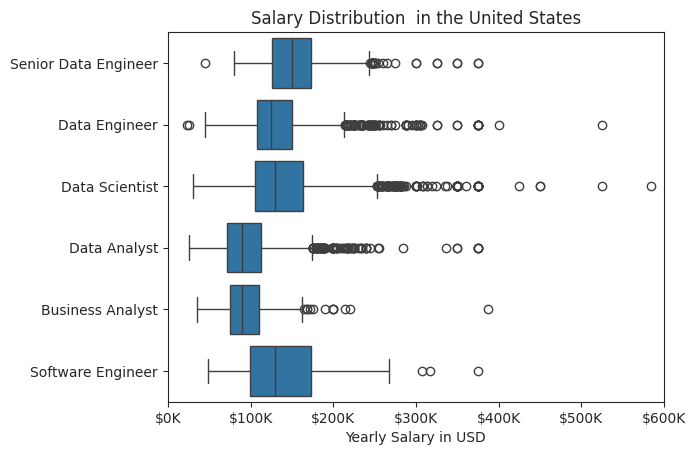

In [3]:
job_titles=df['job_title_short'].value_counts().index[:6].tolist()
df_salary=df[(df['job_title_short'].isin(job_titles)) &(df['job_country']=='United States')].copy()
df_salary.dropna(subset='salary_year_avg')

sns.set_style('ticks')
sns.boxplot(data=df_salary,y='job_title_short',x='salary_year_avg')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
ax.set_xlim(0,700000)
plt.title('Salary Distribution  in the United States')
plt.xlabel('Yearly Salary in USD')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K')
ax.xaxis.set_major_formatter(ticks_x)
plt.show()



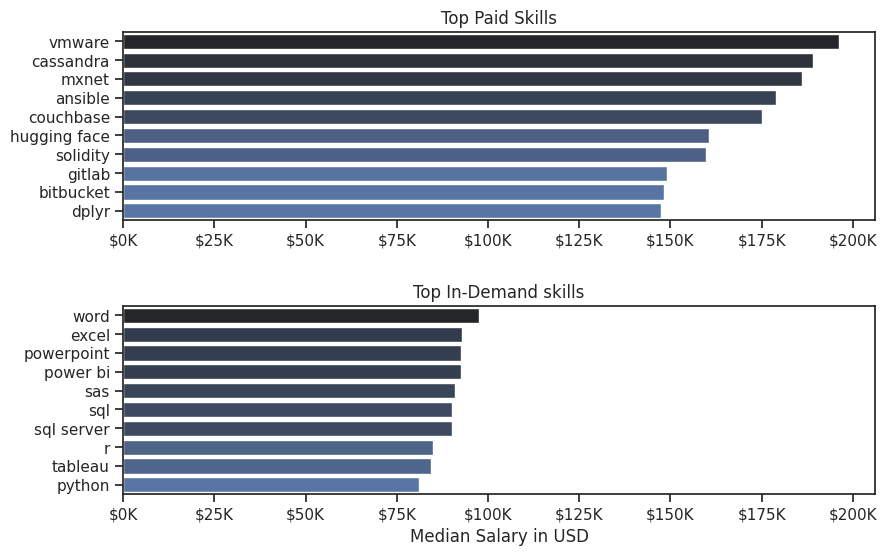

In [4]:
sns.set_theme(style='ticks')
df_DA_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_us=df_DA_us.dropna(subset='salary_year_avg')
df_DA_us=df_DA_us.explode('job_skills')
df_DA_us_group=df_DA_us.groupby('job_skills').agg(job_count=('job_skills','count'),salary_median=('salary_year_avg','median'))
df_da_top_pay=df_DA_us_group.sort_values('salary_median',ascending=False).head(10)
df_da_count=df_DA_us_group.sort_values('job_count',ascending=False).head(10).sort_values('salary_median',ascending=False)
fig,ax=plt.subplots(2,1)
sns.barplot(data=df_da_top_pay[::-1],x='salary_median',y=df_da_top_pay.index,ax=ax[0], hue='salary_median',palette='dark:b_r')
sns.barplot(data=df_da_count[::-1],x='salary_median',y=df_da_count.index,ax=ax[1], hue='salary_median',palette='dark:b_r')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)
ax[0].set_xlabel('')
ax[0].set_ylabel("")
ax[1].set_ylabel('')
ax[1].set_xlabel("Median Salary in USD")

ax[0].set_title('Top Paid Skills')
ax[1].set_title('Top In-Demand skills')
fig.tight_layout()
fig.set_size_inches(10,6)
plt.show()